In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import spectral

In [2]:
freq = 4.9 # Hz
dt = 0.012 # s
t = np.arange(0, 6, dt)
amp = 1
phi = 0
std_noise = 0.0

ye = amp*np.sin(2*np.pi*freq*t + phi)
yo = xr.DataArray(np.random.normal(ye, std_noise), coords={'t': t})

(0.0, 5.988)

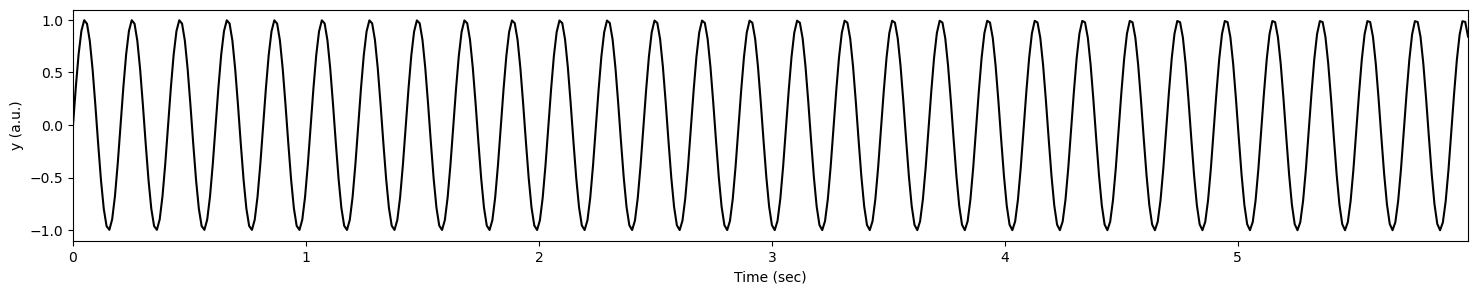

In [3]:
fig, ax = plt.subplots(figsize=(18, 3))
yo.plot(c='k')

ax.set_ylabel('y (a.u.)')
ax.set_xlabel('Time (sec)')
ax.set_xlim(t[0], t[-1])

# Plot periodogram

Text(0.5, 0, 'Frequency (Hz)')

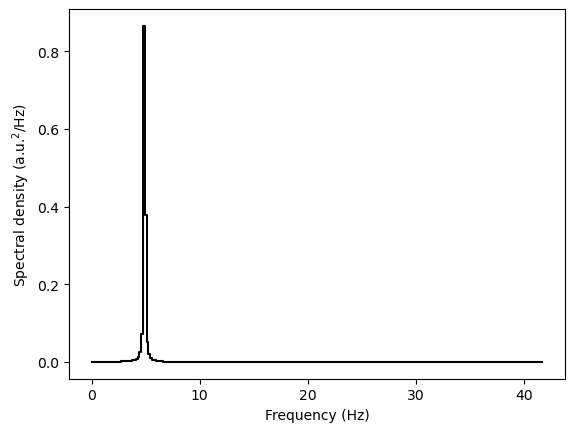

In [7]:
fig, ax  = plt.subplots()

spectral.periodogram(yo).plot(drawstyle="steps-mid", c='k')
plt.ylabel(r'Spectral density (a.u.$^2$/Hz)')
plt.xlabel('Frequency (Hz)')

## Estimate frequency using the method of minimal leakage

In [9]:
result = spectral.minimize_leakage(yo, slice(4, 6))
print(f'f0 = {result.f0:.3f} Hz')

f0 = 4.899 Hz


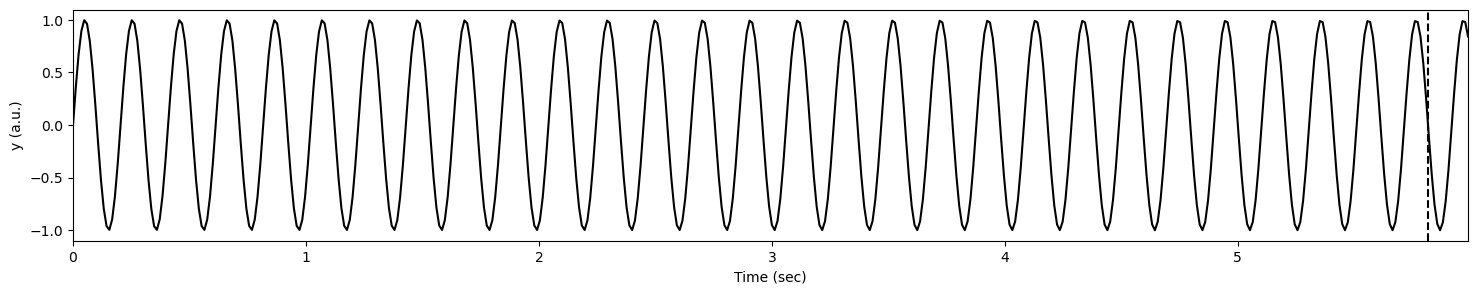

In [10]:
fig, ax = plt.subplots(figsize=(18, 3))
yo.plot(c='k')

ax.set_ylabel('y (a.u.)')
ax.set_xlabel('Time (sec)')
ax.set_xlim(t[0], t[-1])
ax.axvline(x=result.length, c='k', ls='--')

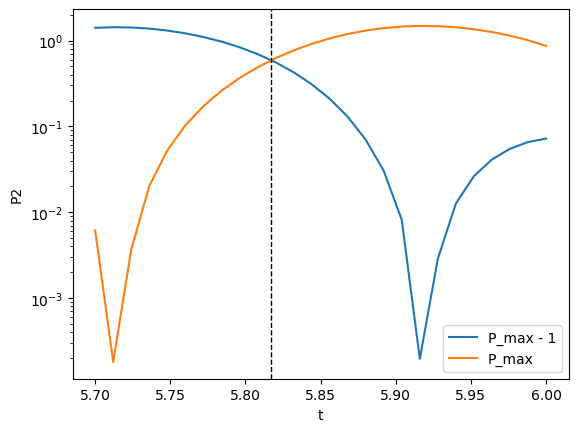

In [12]:
result.P1.plot(label='P_max - 1')
result.P2.plot(label='P_max')
plt.legend()
plt.gca().set_yscale('log')
plt.axvline(x=result.length, c='k', ls='--', lw=1)